<a href="https://colab.research.google.com/github/hunaynr/PCVK_Genap_2021/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Deteksi dan Penghitungan Jumlah Kendaraan**

In [ ]:
from google.colab import drive

# Acessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


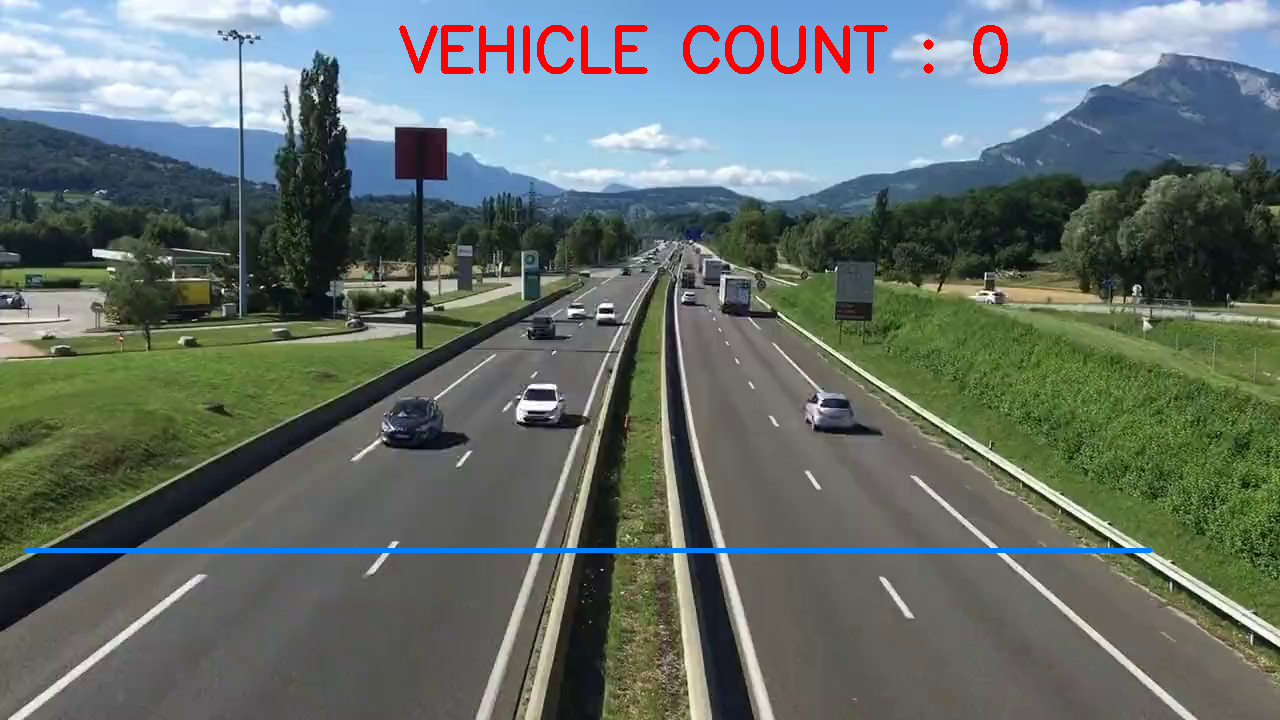

In [ ]:
import cv2
import numpy as np
from time import sleep
from google.colab.patches import cv2_imshow

width_min = 80  # min widht of rectangle
height_min = 80  # min height of rectangle

offset = 6  # error allowed between pixels

line_pos = 550  # count line position

delay = 60  # fps video

detected = []
cars = 0


def handle_centre(x, y, w, h):
    x1 = int(w / 2)
    y1 = int(h / 2)
    cx = x + x1
    cy = y + y1
    return cx, cy


capture = cv2.VideoCapture('/content/drive/MyDrive/Image Processing/vehicle video.mp4')
subtraction = cv2.bgsegm.createBackgroundSubtractorMOG()

while True:
    ret, frame1 = capture.read()
    time = float(1 / delay)
    sleep(time)
    grey = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey, (3, 3), 5)
    img_sub = subtraction.apply(blur)
    dilation = cv2.dilate(img_sub, np.ones((5, 5)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    dilated = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    dilated = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
    contour, h = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cv2.line(frame1, (25, line_pos), (1150, line_pos), (255, 127, 0), 3)
    for (i, c) in enumerate(contour):
        (x, y, w, h) = cv2.boundingRect(c)
        validate_contour = (w >= width_min) and (h >= height_min)
        if not validate_contour:
            continue

        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        centre = handle_centre(x, y, w, h)
        detected.append(centre)
        cv2.circle(frame1, centre, 4, (0, 0, 255), -1)

        for (x, y) in detected:
            if y < (line_pos + offset) and y > (line_pos - offset):
                cars += 1
                cv2.line(frame1, (25, line_pos), (1150, line_pos), (0, 127, 255), 3)
                detected.remove((x, y))
                print("car is detected : " + str(cars))

    cv2.putText(frame1, "VEHICLE COUNT : " + str(cars), (400, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)
    cv2_imshow(frame1)

    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()
capture.release()

##**Deteksi dan Penghitungan Jumlah Objek**

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

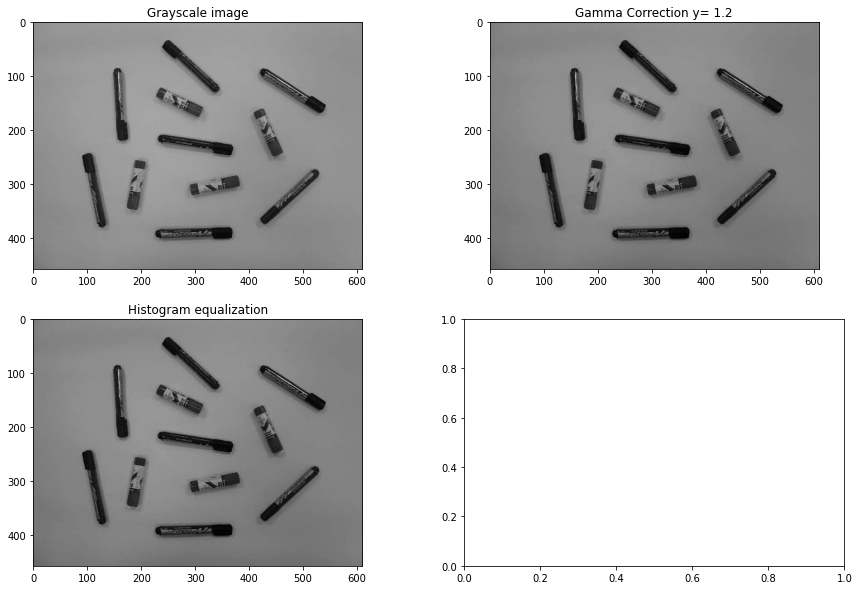

In [29]:
original = cv.imread('/content/drive/MyDrive/Image Processing/objets3.jpg')

f, axarr = plt. subplots(2,2,figsize=(15,10))
# Convert image in grayscale
gray_im = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
plt.subplot(221)
plt.title('Grayscale image')
plt.imshow(gray_im, cmap="gray", vmin=0, vmax=255)

# Contrast adjusting with gamma correction y = 1.2

gray_correct = np.array(255 * (gray_im / 255) ** 1.2 , dtype='uint8')
plt.subplot(222)
plt.title('Gamma Correction y= 1.2')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)

# Contrast adjusting with histogramm equalization
gray_equ = cv.equalizeHist(gray_im)
plt.subplot(223)
plt.title('Histogram equalization')
plt.imshow(gray_correct, cmap="gray", vmin=0, vmax=255)

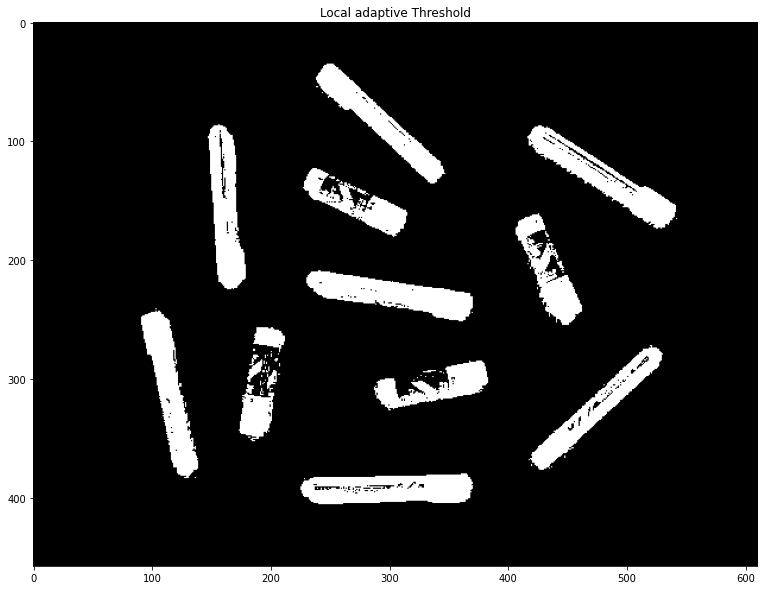

In [30]:
f, axarr = plt. subplots(1,1,figsize=(15,10))
# Local adaptive threshold

thresh = cv.adaptiveThreshold(gray_correct, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 255, 19)
thresh = cv.bitwise_not(thresh)
plt.subplot(111)
plt.title('Local adaptive Threshold')
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)

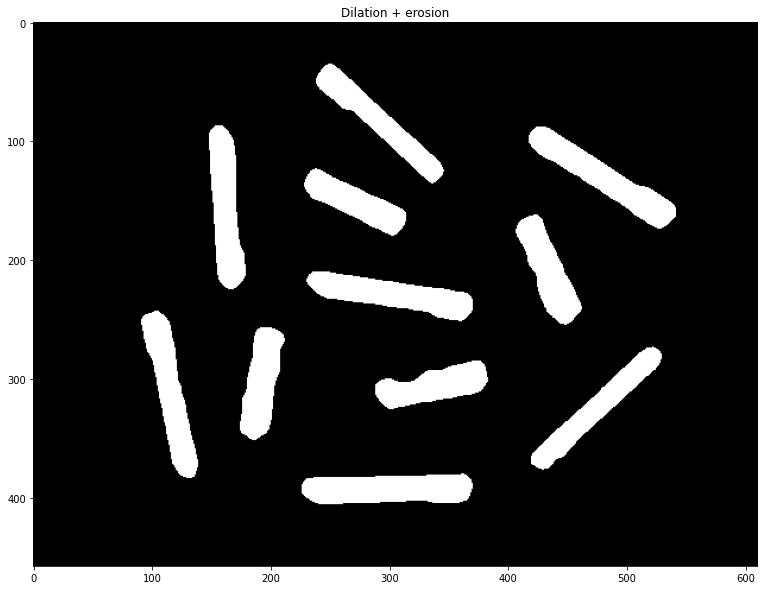

In [31]:
f, axarr = plt. subplots(1,1,figsize=(15,10))
# Dilation and erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv.dilate(thresh, kernel, iterations=1)
img_erode = cv.erode(img_dilation,kernel, iterations=1)

# clean all noise after dilation and erosion
img_erode = cv.medianBlur(img_erode, 7)
plt.subplot(111)
plt.title('Dilation + erosion')
plt.imshow(img_erode, cmap="gray", vmin=0, vmax=255)

objects number is: 11


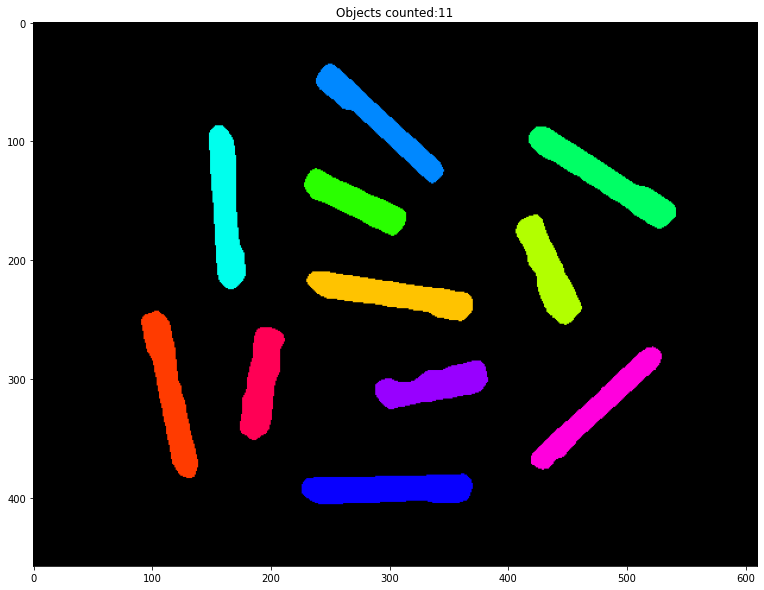

In [32]:
f, axarr = plt. subplots(1,1,figsize=(15,10))
# Labeling
ret, labels = cv.connectedComponents(img_erode)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.subplot(111)
plt.title('Objects counted:'+ str(ret-1))
plt.imshow(labeled_img)
print('objects number is:', ret-1)
plt.show()